In [1]:
import sys
from importlib import reload 
sys.path.append('../hdssm_story/lib')

In [2]:
import utils  # expand_to_hyperboloid
utils = reload(utils)

import distances  # Distances, DistancesAggregator, ProductDistances
distances = reload(distances)
from distances import Distances, ProductDistances

import dssm  # DSSM_V2, JustEmbedding
dssm = reload(dssm)

import layers  # SphericalExponentialMapLayer, HyperbolicalExponentialMapLayer
layers = reload(layers)

In [3]:
utils.self_tests()

expand_to_hyperboloid unittest #1


In [4]:
distances.self_tests()

DistancesAggregator unittest #1...
DistancesAggregator unittest #2...
ProductDistances unittest #1...
ProductDistances unittest #2...
ProductDistances unittest #3...
ProductDistances unittest #4...
str(pd) = E2,S3,H3


In [5]:
layers.self_tests()

SphericalExponentialMapLayer UT 1
SphericalExponentialMapLayer UT 2
HyperbolicalExponentialMapLayer UT 1
HyperbolicalExponentialMapLayer UT 2


________________________

In [6]:
import networkx as nx
import numpy as np
import tensorflow as tf
import tqdm

assert int(tf.__version__.split(".")[0]) >= 2

from matplotlib import pyplot as plt
from IPython.display import clear_output

In [7]:
def make_model(l=312):
    return dssm.JustEmbedding(l, emb_size=10)

def make_model_2(emb_size=10, l=312):
    return dssm.JustEmbedding(l, emb_size=emb_size)

def make_distances(for_ranking=False):
    return [
        ProductDistances([
            (10, Distances("euclidian_corrected" if for_ranking else "euclidian",
                           scalable=False))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l0_corrected" if for_ranking else "triple_trainable_l0",
                           scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_sq_corrected" if for_ranking else "triple_trainable_l1_sq",
                           scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_corrected" if for_ranking else "triple_trainable_l1",
                           scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_hs_corrected" if for_ranking else "triple_trainable_l1_hs",
                           scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_ex_corrected" if for_ranking else "triple_trainable_l1_ex",
                           scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1_sq_ex_corrected" if for_ranking else "triple_trainable_l1_sq_ex",
                           scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("inverted_dot", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("expanded_hyp", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("spherical", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("hyperspherical", scalable=True))
        ], "sum"),
        ProductDistances([
            (5, Distances("expanded_hyp", scalable=True)),
            (5, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (5, Distances("spherical", scalable=True)),
            (5, Distances("spherical", scalable=True)),
        ]),
        ProductDistances([
            (5, Distances("hyperspherical", scalable=True)),
            (5, Distances("hyperspherical", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("hyperspherical", scalable=True)),
            (2, Distances("hyperspherical", scalable=True)),
            (2, Distances("hyperspherical", scalable=True)),
            (2, Distances("hyperspherical", scalable=True)),
            (2, Distances("hyperspherical", scalable=True)),
        ]),
        ProductDistances([
            (5, Distances("spherical", scalable=True)),
            (5, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("spherical", scalable=True)),
            (2, Distances("spherical", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("euclidian", scalable=True)),
        ]),
        ProductDistances([
            (5, Distances("hyperspherical", scalable=True)),
            (5, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (2, Distances("hyperspherical", scalable=True)),
            (2, Distances("hyperspherical", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("euclidian", scalable=True)),
        ]),
    ]


def make_distances_3():
    return [
        ProductDistances([
            (11, Distances("spherical", scalable=True))
        ], "sum"),
        ProductDistances([
            (6, Distances("spherical", scalable=True)),
            (6, Distances("spherical", scalable=True)),
        ]),
        ProductDistances([
            (3, Distances("spherical", scalable=True)),
            (3, Distances("spherical", scalable=True)),
            (3, Distances("spherical", scalable=True)),
            (3, Distances("spherical", scalable=True)),
            (3, Distances("spherical", scalable=True)),
        ]),
        ProductDistances([
            (6, Distances("spherical", scalable=True)),
            (5, Distances("expanded_hyp", scalable=True)),
        ]),
        ProductDistances([
            (3, Distances("spherical", scalable=True)),
            (3, Distances("spherical", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("expanded_hyp", scalable=True)),
            (2, Distances("euclidian", scalable=True)),
        ]),
    ]


def make_distances_exp_dot(k=1):
    return [
        ProductDistances([
            (10, Distances("exp_minus_dot", scalable=True))
        ], "sum")
        for _ in range(k)
    ]


def make_distances_4():
    # only not-corrected ttl1 metrices
    return [
        ProductDistances([
            (10, Distances("triple_trainable_l1_sq", scalable=True))
        ], "sum"),
        ProductDistances([
            (10, Distances("triple_trainable_l1", scalable=True))
        ], "sum"),
    ]

_____________


In [8]:
!ls ../datasets

3d_sphere_triang_120.edges   clique_4.edges		  graph.clusters
3d_sphere_triang_1920.edges  clique_5.edges		  karate.edges
3d_sphere_triang_30.edges    conflict.edges		  polblogs.edges
3d_sphere_triang_480.edges   cora			  polbooks.edges
airport.edges		     CSPhDs.edges		  power.edges
bg_20_700_0.05.edges	     cycle_100.edges		  reactome.edges
bipartite_100.edges	     cycle_5.edges		  smalltree.edges
bipartite_5.edges	     dolphins.edges		  star_100.edges
ca-cit-HepTh.edges	     eu-core.edges		  star_5.edges
Ca-HelpTh.edges		     eu-core-no-self-loops.edges  tree_3_6.edges
chicago.edges		     euroroad.edges		  usca312.edges
citeseer		     EuroSiS.edges		  wla6.edges
clique_100.edges	     facebook.edges		  wla6.nodes
clique_12.edges		     football.edges


In [9]:
G, distances_matrix, r_matrix  = utils.get_dataset("CSPhDs.edges", True, True)
make_model_g = lambda : make_model(len(G.nodes()))
d = make_model_g()
qs = d.sparse_arange(len(G.nodes()))

Loading from ../datasets/CSPhDs.edges
|V| = 1025, |E| = 1043


_____________________
# Training

In [13]:
distortion_loss_storyz = list()

In [14]:
def print_best_distortion():
    for i, d in enumerate(make_distances(False)+make_distances_exp_dot()):
        ar = np.array([
            distortion_loss_story_nth[i][-1]
            for distortion_loss_story_nth in distortion_loss_storyz
        ])
        # print(ar)
        print(f"{ar[:, 0].min(), *ar[:, 1:].max(axis=0)}\t{d}")

In [15]:
def do_distortion_for_lr(lr=0.05):
    distortion_loss_storyz.append(
        utils.estimate_signatures_distortion(
            make_model_2, qs, distances_matrix, r_matrix,
            make_distances(False)+make_distances_exp_dot(), 2000, learning_rate=lr,
            loss_eval_interval=20, draw_interval=20,
            different_d_sum=True, print_results=True
        )
    )
    
    print("\n\n=== Current global best:\n")
    print_best_distortion()

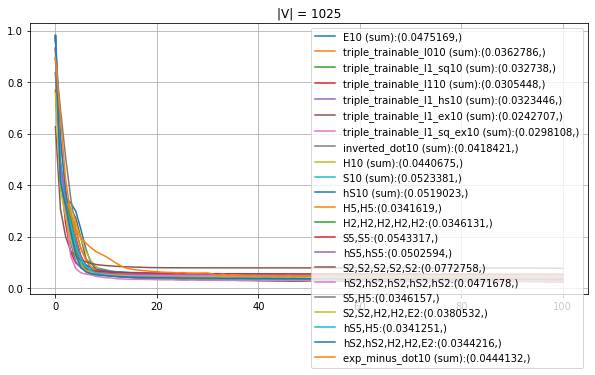


0.0475169	E10 (sum)
0.0362786	triple_trainable_l010 (sum)
0.032738	triple_trainable_l1_sq10 (sum)
0.0305448	triple_trainable_l110 (sum)
0.0323446	triple_trainable_l1_hs10 (sum)
0.0242707	triple_trainable_l1_ex10 (sum)
0.0298108	triple_trainable_l1_sq_ex10 (sum)
0.0418421	inverted_dot10 (sum)
0.0440675	H10 (sum)
0.0523381	S10 (sum)
0.0519023	hS10 (sum)
0.0341619	H5,H5
0.0346131	H2,H2,H2,H2,H2
0.0543317	S5,S5
0.0502594	hS5,hS5
0.0772758	S2,S2,S2,S2,S2
0.0471678	hS2,hS2,hS2,hS2,hS2
0.0346157	S5,H5
0.0380532	S2,S2,H2,H2,E2
0.0341251	hS5,H5
0.0344216	hS2,hS2,H2,H2,E2
0.0444132	exp_minus_dot10 (sum)


=== Current global best:

(0.0475169,)	E10 (sum)
(0.0362786,)	triple_trainable_l010 (sum)
(0.032738,)	triple_trainable_l1_sq10 (sum)
(0.0305448,)	triple_trainable_l110 (sum)
(0.0323446,)	triple_trainable_l1_hs10 (sum)
(0.0242707,)	triple_trainable_l1_ex10 (sum)
(0.0298108,)	triple_trainable_l1_sq_ex10 (sum)
(0.0418421,)	inverted_dot10 (sum)
(0.0440675,)	H10 (sum)
(0.0523381,)	S10 (sum)
(0.0519

In [16]:
do_distortion_for_lr(0.1)

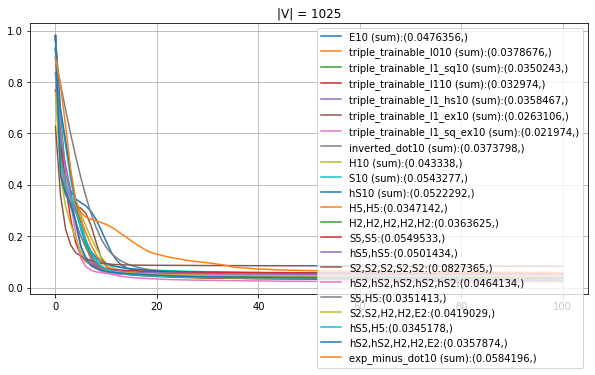


0.0476356	E10 (sum)
0.0378676	triple_trainable_l010 (sum)
0.0350243	triple_trainable_l1_sq10 (sum)
0.032974	triple_trainable_l110 (sum)
0.0358467	triple_trainable_l1_hs10 (sum)
0.0263106	triple_trainable_l1_ex10 (sum)
0.021974	triple_trainable_l1_sq_ex10 (sum)
0.0373798	inverted_dot10 (sum)
0.043338	H10 (sum)
0.0543277	S10 (sum)
0.0522292	hS10 (sum)
0.0347142	H5,H5
0.0363625	H2,H2,H2,H2,H2
0.0549533	S5,S5
0.0501434	hS5,hS5
0.0827365	S2,S2,S2,S2,S2
0.0464134	hS2,hS2,hS2,hS2,hS2
0.0351413	S5,H5
0.0419029	S2,S2,H2,H2,E2
0.0345178	hS5,H5
0.0357874	hS2,hS2,H2,H2,E2
0.0584196	exp_minus_dot10 (sum)


=== Current global best:

(0.0475169,)	E10 (sum)
(0.0362786,)	triple_trainable_l010 (sum)
(0.032738,)	triple_trainable_l1_sq10 (sum)
(0.0305448,)	triple_trainable_l110 (sum)
(0.0323446,)	triple_trainable_l1_hs10 (sum)
(0.0242707,)	triple_trainable_l1_ex10 (sum)
(0.021974,)	triple_trainable_l1_sq_ex10 (sum)
(0.0373798,)	inverted_dot10 (sum)
(0.043338,)	H10 (sum)
(0.0523381,)	S10 (sum)
(0.0519023,

In [17]:
do_distortion_for_lr(0.05)

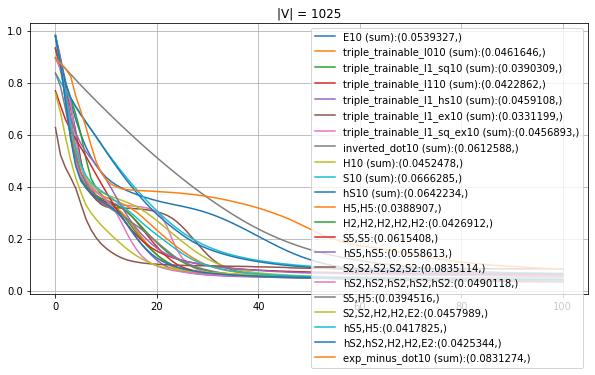


0.0539327	E10 (sum)
0.0461646	triple_trainable_l010 (sum)
0.0390309	triple_trainable_l1_sq10 (sum)
0.0422862	triple_trainable_l110 (sum)
0.0459108	triple_trainable_l1_hs10 (sum)
0.0331199	triple_trainable_l1_ex10 (sum)
0.0456893	triple_trainable_l1_sq_ex10 (sum)
0.0612588	inverted_dot10 (sum)
0.0452478	H10 (sum)
0.0666285	S10 (sum)
0.0642234	hS10 (sum)
0.0388907	H5,H5
0.0426912	H2,H2,H2,H2,H2
0.0615408	S5,S5
0.0558613	hS5,hS5
0.0835114	S2,S2,S2,S2,S2
0.0490118	hS2,hS2,hS2,hS2,hS2
0.0394516	S5,H5
0.0457989	S2,S2,H2,H2,E2
0.0417825	hS5,H5
0.0425344	hS2,hS2,H2,H2,E2
0.0831274	exp_minus_dot10 (sum)


=== Current global best:

(0.0475169,)	E10 (sum)
(0.0362786,)	triple_trainable_l010 (sum)
(0.032738,)	triple_trainable_l1_sq10 (sum)
(0.0305448,)	triple_trainable_l110 (sum)
(0.0323446,)	triple_trainable_l1_hs10 (sum)
(0.0242707,)	triple_trainable_l1_ex10 (sum)
(0.021974,)	triple_trainable_l1_sq_ex10 (sum)
(0.0373798,)	inverted_dot10 (sum)
(0.043338,)	H10 (sum)
(0.0523381,)	S10 (sum)
(0.05190

In [18]:
do_distortion_for_lr(0.01)

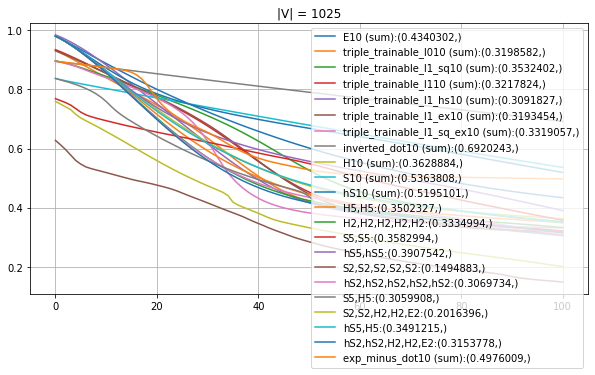


0.4340302	E10 (sum)
0.3198582	triple_trainable_l010 (sum)
0.3532402	triple_trainable_l1_sq10 (sum)
0.3217824	triple_trainable_l110 (sum)
0.3091827	triple_trainable_l1_hs10 (sum)
0.3193454	triple_trainable_l1_ex10 (sum)
0.3319057	triple_trainable_l1_sq_ex10 (sum)
0.6920243	inverted_dot10 (sum)
0.3628884	H10 (sum)
0.5363808	S10 (sum)
0.5195101	hS10 (sum)
0.3502327	H5,H5
0.3334994	H2,H2,H2,H2,H2
0.3582994	S5,S5
0.3907542	hS5,hS5
0.1494883	S2,S2,S2,S2,S2
0.3069734	hS2,hS2,hS2,hS2,hS2
0.3059908	S5,H5
0.2016396	S2,S2,H2,H2,E2
0.3491215	hS5,H5
0.3153778	hS2,hS2,H2,H2,E2
0.4976009	exp_minus_dot10 (sum)


=== Current global best:

(0.0475169,)	E10 (sum)
(0.0362786,)	triple_trainable_l010 (sum)
(0.032738,)	triple_trainable_l1_sq10 (sum)
(0.0305448,)	triple_trainable_l110 (sum)
(0.0323446,)	triple_trainable_l1_hs10 (sum)
(0.0242707,)	triple_trainable_l1_ex10 (sum)
(0.021974,)	triple_trainable_l1_sq_ex10 (sum)
(0.0373798,)	inverted_dot10 (sum)
(0.043338,)	H10 (sum)
(0.0523381,)	S10 (sum)
(0.05190

In [19]:
do_distortion_for_lr(0.001)

In [20]:
softmax_loss_storyz = list()

In [21]:
def print_best_softmax():
    for i, d in enumerate(make_distances(True)+make_distances_exp_dot()):
        ar = np.array([
            softmax_loss_story_nth[i][-1]
            for softmax_loss_story_nth in softmax_loss_storyz
        ])
        # print(ar)
        print(f"{ar[:, 0].min(), *ar[:, 1:].max(axis=0)}\t{d}")

In [22]:
def do_softmax_for_lr(lr=0.05):
    softmax_loss_storyz.append(
        utils.estimate_signatures_softmax(
            make_model_2, qs, distances_matrix=distances_matrix, r_matrix=r_matrix,
            dists=make_distances(True)+make_distances_exp_dot(), iters=1000, learning_rate=lr,
            loss_eval_interval=20, draw_interval=20,
            print_results=True, different_d_sum=True
        )
    )
    
    print("\n\n=== Current global best:\n")
    print_best_softmax()

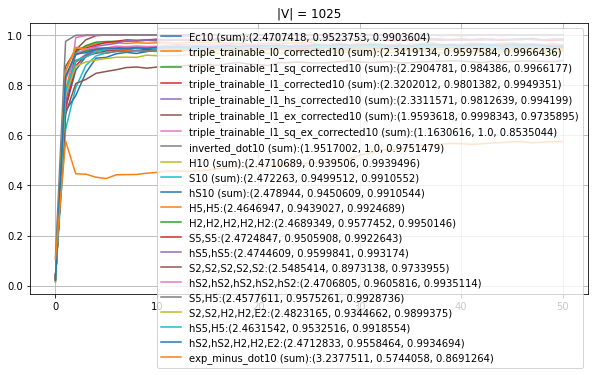


0.9523753	Ec10 (sum)
0.9597584	triple_trainable_l0_corrected10 (sum)
0.984386	triple_trainable_l1_sq_corrected10 (sum)
0.9801382	triple_trainable_l1_corrected10 (sum)
0.9812639	triple_trainable_l1_hs_corrected10 (sum)
0.9998343	triple_trainable_l1_ex_corrected10 (sum)
1.0	triple_trainable_l1_sq_ex_corrected10 (sum)
1.0	inverted_dot10 (sum)
0.939506	H10 (sum)
0.9499512	S10 (sum)
0.9450609	hS10 (sum)
0.9439027	H5,H5
0.9577452	H2,H2,H2,H2,H2
0.9505908	S5,S5
0.9599841	hS5,hS5
0.8973138	S2,S2,S2,S2,S2
0.9605816	hS2,hS2,hS2,hS2,hS2
0.9575261	S5,H5
0.9344662	S2,S2,H2,H2,E2
0.9532516	hS5,H5
0.9558464	hS2,hS2,H2,H2,E2
0.5744058	exp_minus_dot10 (sum)


=== Current global best:

(2.4707418, 0.9523753, 0.9903604)	Ec10 (sum)
(2.3419134, 0.9597584, 0.9966436)	triple_trainable_l0_corrected10 (sum)
(2.2904781, 0.984386, 0.9966177)	triple_trainable_l1_sq_corrected10 (sum)
(2.3202012, 0.9801382, 0.9949351)	triple_trainable_l1_corrected10 (sum)
(2.3311571, 0.9812639, 0.994199)	triple_trainable_l1_hs_cor

In [23]:
do_softmax_for_lr(0.1)

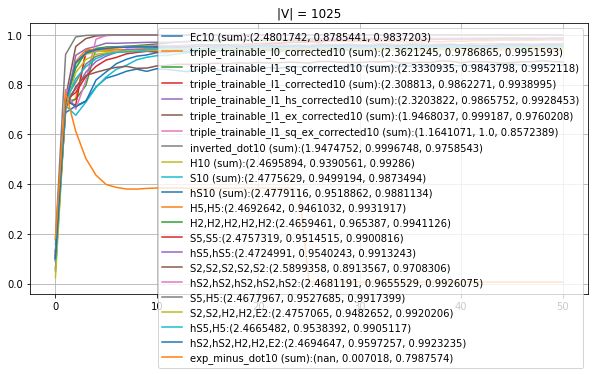


0.8785441	Ec10 (sum)
0.9786865	triple_trainable_l0_corrected10 (sum)
0.9843798	triple_trainable_l1_sq_corrected10 (sum)
0.9862271	triple_trainable_l1_corrected10 (sum)
0.9865752	triple_trainable_l1_hs_corrected10 (sum)
0.999187	triple_trainable_l1_ex_corrected10 (sum)
1.0	triple_trainable_l1_sq_ex_corrected10 (sum)
0.9996748	inverted_dot10 (sum)
0.9390561	H10 (sum)
0.9499194	S10 (sum)
0.9518862	hS10 (sum)
0.9461032	H5,H5
0.965387	H2,H2,H2,H2,H2
0.9514515	S5,S5
0.9540243	hS5,hS5
0.8913567	S2,S2,S2,S2,S2
0.9655529	hS2,hS2,hS2,hS2,hS2
0.9527685	S5,H5
0.9482652	S2,S2,H2,H2,E2
0.9538392	hS5,H5
0.9597257	hS2,hS2,H2,H2,E2
0.007018	exp_minus_dot10 (sum)


=== Current global best:

(2.4707418, 0.9523753, 0.9903604)	Ec10 (sum)
(2.3419134, 0.9786865, 0.9966436)	triple_trainable_l0_corrected10 (sum)
(2.2904781, 0.984386, 0.9966177)	triple_trainable_l1_sq_corrected10 (sum)
(2.308813, 0.9862271, 0.9949351)	triple_trainable_l1_corrected10 (sum)
(2.3203822, 0.9865752, 0.994199)	triple_trainable_l1_hs

In [24]:
do_softmax_for_lr(0.05)

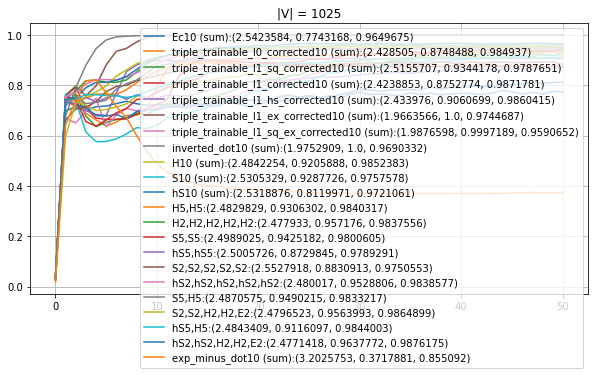


0.7743168	Ec10 (sum)
0.8748488	triple_trainable_l0_corrected10 (sum)
0.9344178	triple_trainable_l1_sq_corrected10 (sum)
0.8752774	triple_trainable_l1_corrected10 (sum)
0.9060699	triple_trainable_l1_hs_corrected10 (sum)
1.0	triple_trainable_l1_ex_corrected10 (sum)
0.9997189	triple_trainable_l1_sq_ex_corrected10 (sum)
1.0	inverted_dot10 (sum)
0.9205888	H10 (sum)
0.9287726	S10 (sum)
0.8119971	hS10 (sum)
0.9306302	H5,H5
0.957176	H2,H2,H2,H2,H2
0.9425182	S5,S5
0.8729845	hS5,hS5
0.8830913	S2,S2,S2,S2,S2
0.9528806	hS2,hS2,hS2,hS2,hS2
0.9490215	S5,H5
0.9563993	S2,S2,H2,H2,E2
0.9116097	hS5,H5
0.9637772	hS2,hS2,H2,H2,E2
0.3717881	exp_minus_dot10 (sum)


=== Current global best:

(2.4707418, 0.9523753, 0.9903604)	Ec10 (sum)
(2.3419134, 0.9786865, 0.9966436)	triple_trainable_l0_corrected10 (sum)
(2.2904781, 0.984386, 0.9966177)	triple_trainable_l1_sq_corrected10 (sum)
(2.308813, 0.9862271, 0.9949351)	triple_trainable_l1_corrected10 (sum)
(2.3203822, 0.9865752, 0.994199)	triple_trainable_l1_hs_cor

In [25]:
do_softmax_for_lr(0.01)

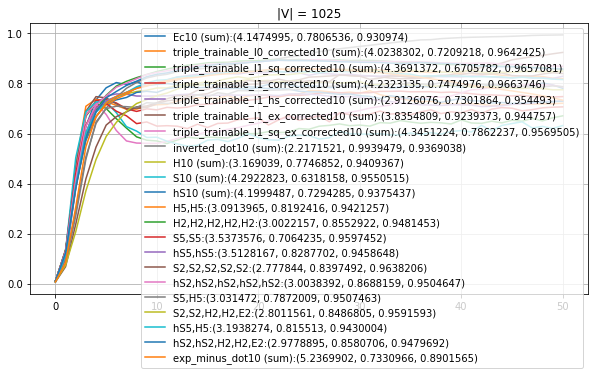


0.7806536	Ec10 (sum)
0.7209218	triple_trainable_l0_corrected10 (sum)
0.6705782	triple_trainable_l1_sq_corrected10 (sum)
0.7474976	triple_trainable_l1_corrected10 (sum)
0.7301864	triple_trainable_l1_hs_corrected10 (sum)
0.9239373	triple_trainable_l1_ex_corrected10 (sum)
0.7862237	triple_trainable_l1_sq_ex_corrected10 (sum)
0.9939479	inverted_dot10 (sum)
0.7746852	H10 (sum)
0.6318158	S10 (sum)
0.7294285	hS10 (sum)
0.8192416	H5,H5
0.8552922	H2,H2,H2,H2,H2
0.7064235	S5,S5
0.8287702	hS5,hS5
0.8397492	S2,S2,S2,S2,S2
0.8688159	hS2,hS2,hS2,hS2,hS2
0.7872009	S5,H5
0.8486805	S2,S2,H2,H2,E2
0.815513	hS5,H5
0.8580706	hS2,hS2,H2,H2,E2
0.7330966	exp_minus_dot10 (sum)


=== Current global best:

(2.4707418, 0.9523753, 0.9903604)	Ec10 (sum)
(2.3419134, 0.9786865, 0.9966436)	triple_trainable_l0_corrected10 (sum)
(2.2904781, 0.984386, 0.9966177)	triple_trainable_l1_sq_corrected10 (sum)
(2.308813, 0.9862271, 0.9949351)	triple_trainable_l1_corrected10 (sum)
(2.3203822, 0.9865752, 0.994199)	triple_trainab

In [26]:
do_softmax_for_lr(0.001)